# STA130 Homework 08 Due Nov21

## Q1

a) 
A **Classification Decision Tree** is a machine learning model designed to solve **classification problems**, where the goal is to assign data points to predefined categories or classes. These trees split the data based on feature values, forming branches that lead to decisions about the class of the input data.

Real-world applications include:

1. **Medical Diagnosis:** Predicting whether a patient has a specific disease based on symptoms and test results.
2. **Customer Segmentation:** Classifying customers into categories such as "loyal," "at risk," or "churn" based on purchasing behavior.
3. **Spam Detection:** Identifying whether an email is spam or not based on its content and metadata.
4. **Credit Risk Assessment:** Determining if a loan applicant should be classified as low-risk or high-risk based on financial data.
5. **Fraud Detection:** Classifying transactions as fraudulent or legitimate using patterns in transaction data.

b)
A **Classification Decision Tree** and **Multiple Linear Regression** are fundamentally different in their goals and prediction mechanisms:

1. **Goal:**
   - A **Classification Decision Tree** predicts discrete categories or classes (e.g., "Yes" or "No," "Spam" or "Not Spam").
   - **Multiple Linear Regression** predicts continuous numerical values (e.g., house prices, temperature).

2. **Prediction Mechanism:**
   - **Classification Decision Tree:**
     - The tree splits data at decision nodes based on feature thresholds to maximize class separation (e.g., "Is age > 30?").
     - At each leaf node, the tree outputs the majority class (or probability distribution over classes) of the training data that reached the node.
   - **Multiple Linear Regression:**
     - It computes a continuous output using a weighted sum of input features, where weights are coefficients determined during training. The formula is \( y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n \), where \( y \) is the predicted value.

3. **Nature of the Output:**
   - **Classification Decision Tree:** The output is categorical (e.g., Class A or B).
   - **Multiple Linear Regression:** The output is a real number (e.g., 78.5).

4. **Example:**
   - **Classification Decision Tree:** Predicts whether a patient has diabetes based on input features (e.g., age, BMI, blood sugar levels).
   - **Multiple Linear Regression:** Predicts the patient’s blood sugar level as a continuous value.

## Q2

### 1. **Accuracy**
- **Definition:** Accuracy measures the proportion of true results (both true positives and true negatives) among the total population.

- **Use Case:** Best used in scenarios where both false positives and false negatives carry similar consequences.
  - **Example:** Classifying emails as spam or not spam. Misclassifying a few emails (spam as not spam or vice versa) might not have severe consequences in this case.

- **Rationale:** Accuracy is ideal when the dataset is balanced, and misclassification of positive and negative classes is equally important.

---

### 2. **Sensitivity (Recall or True Positive Rate)**
- **Definition:** Sensitivity measures the proportion of actual positives correctly identified.

- **Use Case:** Important in scenarios where missing a positive case has severe consequences.
  - **Example:** Medical diagnosis for diseases like cancer. Detecting all actual cancer patients (minimizing false negatives) is crucial, even if some false positives occur.

- **Rationale:** Sensitivity ensures you catch as many positives as possible, making it ideal for early detection or high-risk conditions.

---

### 3. **Specificity (True Negative Rate)**
- **Definition:** Specificity measures the proportion of actual negatives that are correctly identified.

- **Use Case:** Critical in scenarios where misclassifying a negative case as positive has serious consequences.
  - **Example:** Screening passengers at airport security. Minimizing false positives avoids unnecessary detainment of innocent passengers.

- **Rationale:** Specificity is important in systems where avoiding false alarms or over-detection is crucial.

---

### 4. **Precision (Positive Predictive Value)**
- **Definition:** Precision measures the proportion of predicted positive identifications that are correct.

- **Use Case:** Relevant in situations where the cost of false positives is high.
  - **Example:** Fraud detection in banking. If many legitimate transactions are flagged as fraudulent (false positives), it could damage customer trust.

- **Rationale:** Precision focuses on the reliability of positive predictions and is essential when you care more about avoiding false positives.


## Q3

In [17]:
# Importing necessary libraries
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"

# Step 3: Setting data types for specific columns (with .loc to avoid warnings)
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Inspect the cleaned dataset
print("Cleaned Dataset Info:")
print(ab_reduced_noNaN.info())

print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe(include='all'))

# Optionally: Save the cleaned data for further analysis
ab_reduced_noNaN.to_csv("cleaned_amazon_books.csv", index=False)


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Summary Statistics:
                   Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi P

## Q4

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Set random seed for reproducibility
random_seed = 42

# Create the 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed
)

# Report the number of observations in training and testing sets
train_count = len(ab_reduced_noNaN_train)
test_count = len(ab_reduced_noNaN_test)

train_count, test_count


(255, 64)

## Q5

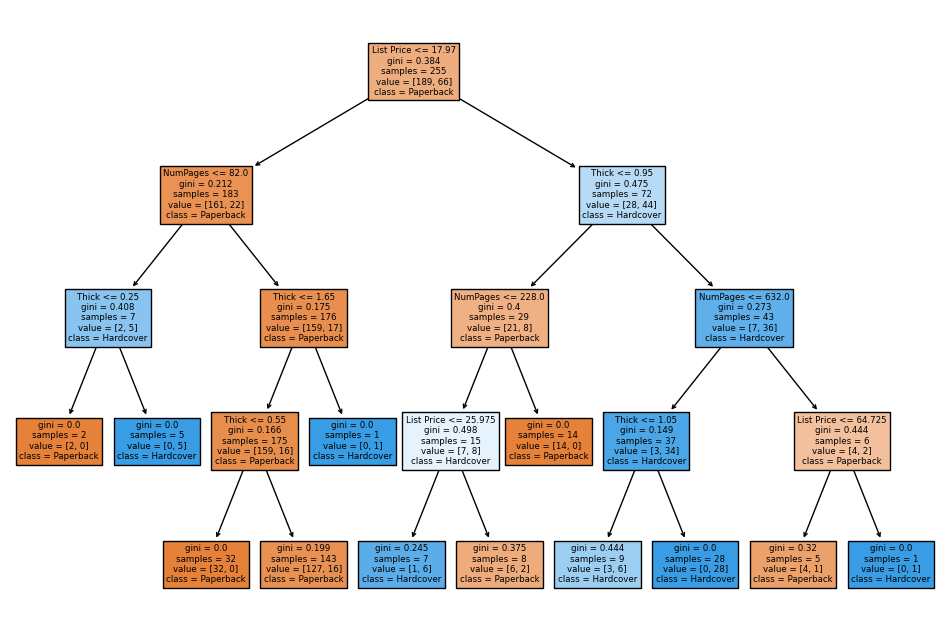

In [19]:
# Train a DecisionTreeClassifier with additional features and a max depth of 4
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable

# Use the same train/test split as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the new classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the new Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

## Q6

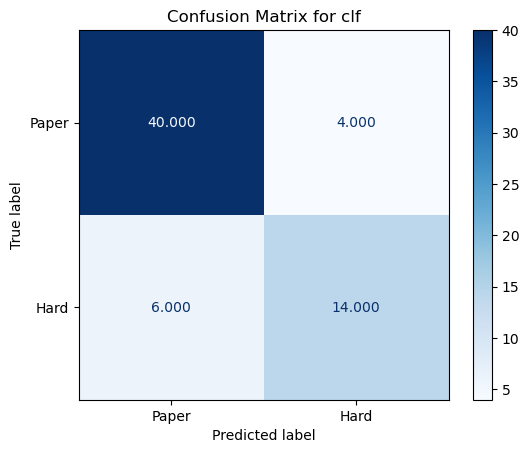

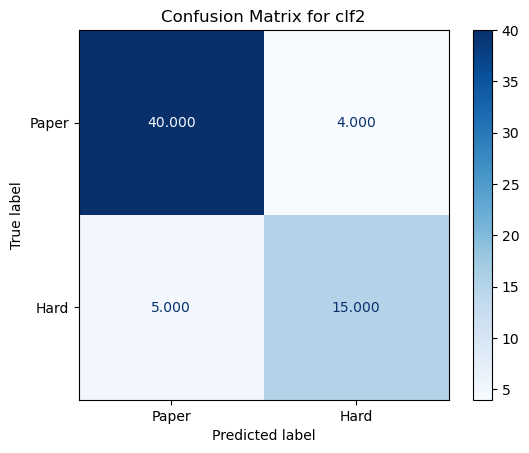

{'clf': {'accuracy': 0.844, 'sensitivity': 0.7, 'specificity': 0.909},
 'clf2': {'accuracy': 0.859, 'sensitivity': 0.75, 'specificity': 0.909}}

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay

# Define test data for clf and clf2
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)
specificity_clf = conf_matrix_clf[0, 0] / (conf_matrix_clf[0, 0] + conf_matrix_clf[0, 1])

# Calculate metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = conf_matrix_clf2[0, 0] / (conf_matrix_clf2[0, 0] + conf_matrix_clf2[0, 1])

# Round metrics for readability
accuracy_clf, sensitivity_clf, specificity_clf = map(
    lambda x: round(x, 3), [accuracy_clf, sensitivity_clf, specificity_clf]
)
accuracy_clf2, sensitivity_clf2, specificity_clf2 = map(
    lambda x: round(x, 3), [accuracy_clf2, sensitivity_clf2, specificity_clf2]
)

# Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf, display_labels=['Paper', 'Hard'])
disp_clf.plot(cmap='Blues', values_format='.3f')
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_clf2, display_labels=['Paper', 'Hard'])
disp_clf2.plot(cmap='Blues', values_format='.3f')
plt.title("Confusion Matrix for clf2")
plt.show()

# Output metrics
{
    "clf": {"accuracy": accuracy_clf, "sensitivity": sensitivity_clf, "specificity": specificity_clf},
    "clf2": {"accuracy": accuracy_clf2, "sensitivity": sensitivity_clf2, "specificity": specificity_clf2}
}


## Q7

The differences between the two confusion matrices arise from the predictor variables used in each model. The first confusion matrix corresponds to a model trained using only the **List Price** variable, which likely captures less information about the relationship between predictors and the target variable, leading to less precise classifications. The second matrix corresponds to a model trained using **NumPages**, **Thick**, and **List Price**, which allows the model to make predictions based on more detailed and diverse features, potentially leading to better performance.

The confusion matrices for **clf** and **clf2** (created using the test set) are better for evaluating the models because they assess the generalizability of the models on unseen data. In contrast, these two confusion matrices (generated using the training set) may reflect overfitting and not provide a realistic measure of the models' performance on new data. Therefore, evaluating performance on the test set is more reliable and meaningful.

## Q8

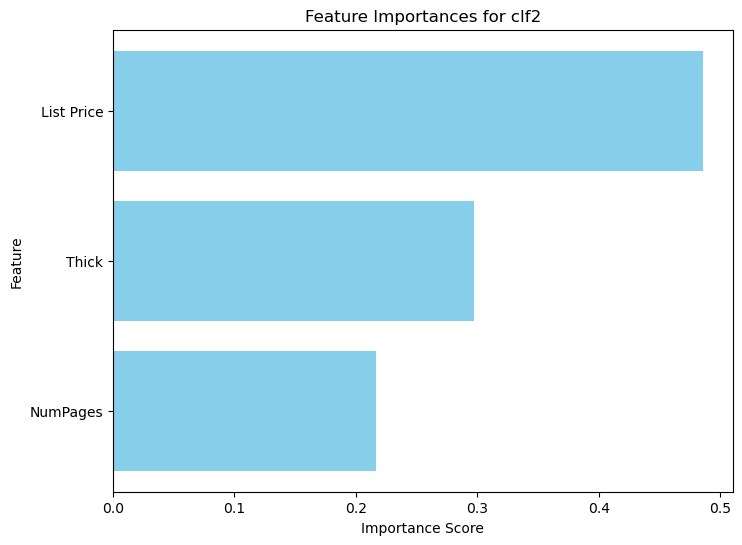

('List Price', array([0.21653658, 0.29748977, 0.48597366]))

In [21]:
# Visualize feature importances for clf2 and determine the most important feature

import matplotlib.pyplot as plt
import numpy as np

# Feature importance from clf2
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances for clf2")
plt.show()

# Determine the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]

most_important_feature, feature_importances


## Q9

In linear regression, coefficients directly quantify the relationship between each predictor variable and the target variable, representing the expected change in the target for a one-unit increase in the predictor, assuming all other predictors are held constant. This makes interpretation straightforward and additive, as the coefficients directly determine how predictions are computed.

In decision trees, feature importances indicate the relative contribution of each predictor variable to the overall model performance. These contributions are based on the reduction of a criterion (e.g., Gini impurity or entropy) achieved at each split involving the feature. Unlike coefficients in linear regression, feature importances provide an overall summary of influence across the tree, rather than explicit, interpretable weights for prediction. This makes interpretation less direct and more heuristic.

## Q10

YES

# Summaries of ChatBot session of all questions

### Summary of Interactions

#### 1. **Exploring the Amazon Books Dataset**
   - Initially, you requested exploratory data analysis (EDA) and preprocessing of the Amazon Books dataset.
   - Preprocessing steps included removing specific columns (`Weight_oz`, `Width`, `Height`), dropping rows with missing values (`NaN`), and converting columns to appropriate data types (`Pub year` and `NumPages` as integers, and `Hard_or_Paper` as a category).

#### 2. **Training and Visualizing a Decision Tree (clf)**
   - You created an 80/20 train-test split for the dataset.
   - A classification decision tree (`clf`) was trained using the `List Price` variable to predict whether a book is hardcover or paperback. The tree had a maximum depth of 2.
   - The decision tree was visualized using `tree.plot_tree`.

#### 3. **Training and Visualizing a More Complex Decision Tree (clf2)**
   - Another decision tree (`clf2`) was trained using `NumPages`, `Thick`, and `List Price` as predictors, with a maximum depth of 4.
   - This tree was also visualized, and you examined how predictions were influenced by the additional features compared to `clf`.

#### 4. **Confusion Matrices and Performance Metrics**
   - Confusion matrices were created for `clf` and `clf2` using the test data. Metrics including sensitivity, specificity, and accuracy were calculated for both models.
   - You examined differences in model performance, noting that `clf2` generally provided better predictions due to the inclusion of more features.

#### 5. **Feature Importances in Decision Trees**
   - The concept of feature importance in decision trees was explained, highlighting how it measures the relative contribution of each feature to reducing impurity in the tree.
   - The feature importances for `clf2` were visualized, and the most important predictor variable was identified.

#### 6. **Comparing Interpretation: Linear Regression vs. Decision Trees**
   - You explored the differences in interpreting coefficients in linear regression versus feature importances in decision trees.
   - Coefficients in linear regression provide direct, additive relationships between predictors and the target variable. In contrast, feature importances in decision trees summarize the overall contribution of each predictor to the model's performance, based on impurity reduction.

This summary encapsulates the key points of our interactions. Let me know if you’d like further clarification or adjustments!

In [ ]:
Link: https://chatgpt.com/share/673eb863-9ddc-8001-8ddb-2dfd1598d8aa